In [1]:
from maelzel.core import *


A Chain is a sequence of events (notes, chords, clips, rests)

Chain([3G:0.5♩, 3A#:0.5♩, 4D:0.75♩, 4F#:0.75♩, 4A:0.5♩, 5C:0.5♩, 5E:0.5♩, 5G#:1♩, 5B:1♩, 6C#:0.333♩, …])
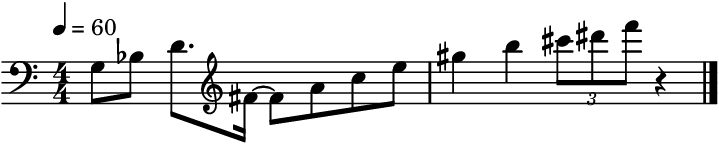

In [2]:
chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Note("5G#", 1),
    Note("5B", 1),
    Note("6C#", F(1, 3)),
    Note("6Eb", F(1, 3)),
    Note("6F", F(1, 3))
])
chain

Events (`Notes`, `Chords`, `Clips`, …) can have an **explicit** *offset*. This *offset* represents the start time of the event relative to the start of the Chain

Chain([3G:0.5♩, 3A#:0.5♩, 4D:0.75♩, 4F#:0.75♩, 4A:0.5♩, 5C:0.5♩, 5E:0.5♩, 5G#:1♩:offset=6, 5B:1♩, 6C#:0.333♩, …])
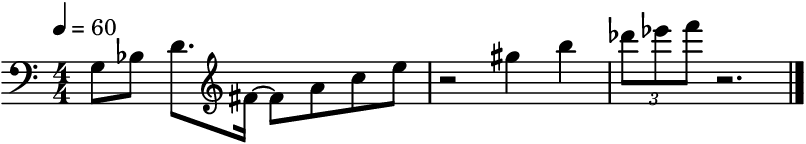

In [3]:
chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Note("5G#", 1, offset=6),        # <------ explicit offset
    Note("5B", 1),
    Note("6C#", F(1, 3)),
    Note("6Eb", F(1, 3)),
    Note("6F", F(1, 3))
])
chain

### Chains within Chains

A `Chain` can contain other `Chains`. Notice the effect of the *offset* now: it represents the start of the object relative to the parent `Chain`, resulting in a silence of 6 quarternotes.

Chain([3G:0.5♩, 3A#:0.5♩, 4D:0.75♩, 4F#:0.75♩, 4A:0.5♩, 5C:0.5♩, 5E:0.5♩, Chain([5G#:1♩:offset=6, 5B:1♩, 6C#:0.333♩, 6D#:0.333♩, 6F:0.333♩])])
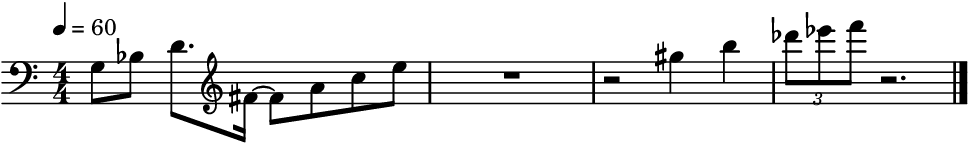

In [4]:
chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Chain([
        Note("5G#", 1, offset=6),
        Note("5B", 1),
        Note("6C#", F(1, 3)),
        Note("6Eb", F(1, 3)),
        Note("6F", F(1, 3))
    ])
])
chain

A `Chain` itself can also have an *offset*. To reproduce the original example, we can set the offset in the subchain itself

Chain([3G:0.5♩, 3A#:0.5♩, 4D:0.75♩, 4F#:0.75♩, 4A:0.5♩, 5C:0.5♩, 5E:0.5♩, Chain([5G#:1♩, 5B:1♩, 6C#:0.333♩, 6D#:0.333♩, 6F:0.333♩], offset=6)])
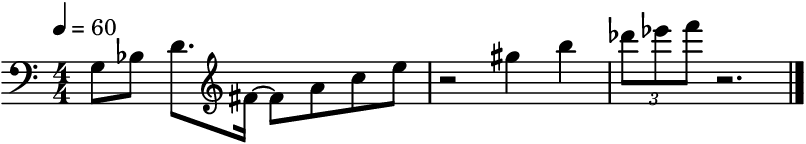

In [5]:
chain = Chain([
    Note("3G", 0.5),
    Note("3Bb", 0.5),
    Note("4D", 0.75),
    Note("4F#", 0.75),
    Note("4A", 0.5),
    Note("5C", 0.5),
    Note("5E", 0.5),
    Chain([
        Note("5G#", 1),
        Note("5B", 1),
        Note("6C#", F(1, 3)),
        Note("6Eb", F(1, 3)),
        Note("6F", F(1, 3))
    ], offset=6)
])
chain

### Side-Note: dumping for debugging purposes

If you have any doubt as to how the times are calculated, it is possible to `.dump()` a Chain. This will recursively dump any subchains. At the *offset* column it is possible to see the implicit offset (in parenthesis), which is always relative to the parent, and the calculated *beat*, which is the absolute offset measured in quarter notes. The *location* represents the placement of the object within the active score structure

In [6]:
chain.dump()

It is possible to flatten a Chain. As a consequence of flattening, any **implicit** *offset* is turned **explicit** (notice in the dump that the *offsets* are **not printed inside parenthesis**, indicating that they are indeed explicit) 

In [7]:
chain.flat().dump()

### Side Note 2: Shorthand

Any note or chord can be represented as a string in shorthand. Each event can be its own string or all events can be placed within a multiline string with each event using one line

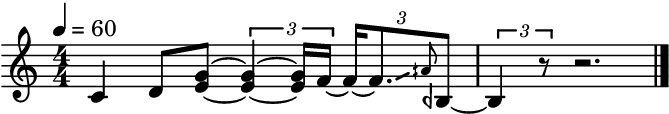

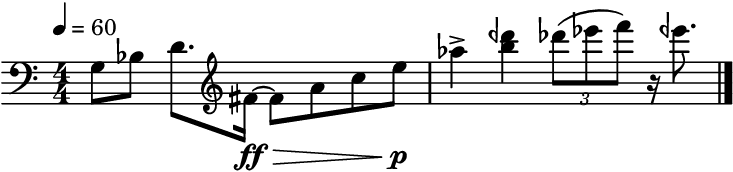

In [2]:
chain1 = Chain([
    "4C:1",
    "4D:0.5",
    "4E,4G:1+1/3",  # a chord
    "4F~:1/3",      # a tied note
    "4F:1/2:gliss",
    "4A+:0",        # a gracenote
    "3B-"
])
chain1.show()

chain2 = Chain(r"""
    3G:0.5
    3Bb:0.5
    4D:3/4
    4F#:3/4:ff:dim   # This dim. hairpin will stretch until the next dynamic
    4A:1/2
    5C:1/2
    5E:1/2:p
    5G#:1:accent
    5B,6D-:1
    6C#:1/3:slur     # starts a slur
    6Eb:1/3
    6F:1/3:~slur     # ends the previous slur
    rest/16          # A 16th note
    6E-/8.           # A dotted 8th note
""")
chain2.show()

There are actions which can only be performed on voices. A `Voice` is very similar to a `Chain`, but always has an offset of 0. They are covered later on.

In this example we convert to a Voice in order to break a beam at a given boundary

Voice([3G:0.5♩, 3A#:0.5♩, 4D:0.75♩, 4F#:0.75♩:symbols=[Hairpin(anchor=<weakref at 0x7f3066625a90; to 'Note' at 0x7f30659e1cc0>, direction=>, kind=start, linetype=solid, uuid=wnnpd4w8)], 4A:0.5♩, 5C:0.5♩, 5E:0.5♩, 5G#:1♩:symbols=[Articulation(kind=accent)], ‹5B 6D- 1♩›, 6C#:0.333♩:symbols=[Slur(anchor=<weakref at 0x7f3065ac1770; to 'Note' at 0x7f30659f1220>, kind=start, linetype=solid, uuid=cqw5o70x)], …], offset=0)
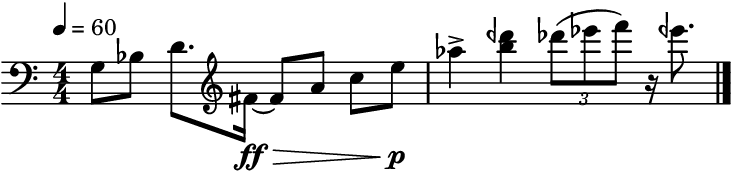

In [9]:
v = chain2.asVoice()
v.breakBeam(3)
v

### Operations on Chains

Chain([5F:0.5♩, 5D:0.5♩, 4A#:0.75♩, 4F#:0.75♩:symbols=[Hairpin(anchor=<weakref at 0x7f3066625a90; to 'Note' at 0x7f30659e1cc0>, direction=>, kind=start, linetype=solid, uuid=wnnpd4w8)], 4D#:0.5♩, 4C:0.5♩, 3G#:0.5♩, 3E:1♩:symbols=[Articulation(kind=accent)], ‹3C# 2B- 1♩›, 2B:0.333♩:symbols=[Slur(anchor=<weakref at 0x7f3065ac1770; to 'Note' at 0x7f30659f1220>, kind=start, linetype=solid, uuid=cqw5o70x)], …])
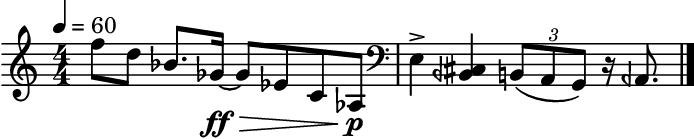

In [10]:
chain2.invertPitch(pivot="4F#")

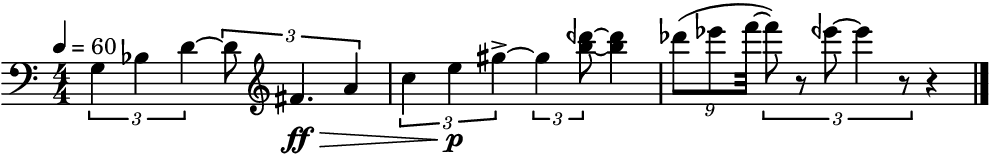

In [3]:
with CoreConfig({'quant.complexity': 'highest'}):
    chain2.timeScale(factor=F(4,3)).show()
   

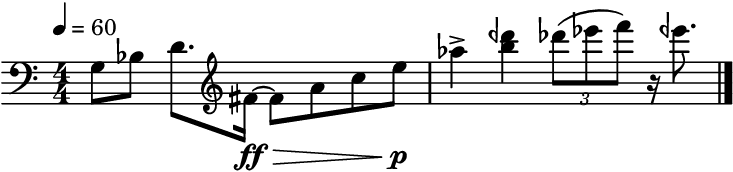

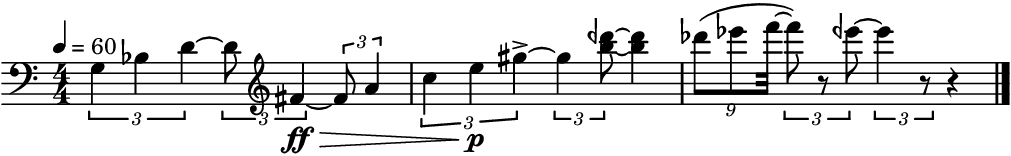

In [9]:
chain2 = Chain(r"""
    3G:0.5
    3Bb:0.5
    4D:3/4
    4F#:3/4:ff:dim   # This dim. hairpin will stretch until the next dynamic
    4A:1/2
    5C:1/2
    5E:1/2:p
    5G#:1:accent
    5B,6D-:1
    6C#:1/3:slur     # starts a slur
    6Eb:1/3
    6F:1/3:~slur     # ends the previous slur
    rest/16          # A 16th note
    6E-/8.           # A dotted 8th note
""")

chain2.show()

chain3 = chain2.timeScale(factor=F(4, 3))
chain3.show()
